In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive
import os

# Mounting the Google Drive for getting access to the input and output folders
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#     /content/drive/MyDrive/Dissertation Aditya Parmar : testing of Large Lang. Model/1000GPT_image_metrics_output.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Image_Name                 949 non-null    object 
 1   SSIM                       949 non-null    float64
 2   PixelMatch_DiffPercentage  949 non-null    float64
 3   CLIP                       949 non-null    float64
 4   HTML_Valid                 949 non-null    bool   
 5   Semantic_Precision         949 non-null    float64
 6   Semantic_Recall            949 non-null    float64
 7   PixelMatch_Normalized      949 non-null    float64
dtypes: bool(1), float64(6), object(1)
memory usage: 53.0+ KB
None
             SSIM  PixelMatch_DiffPercentage        CLIP  Semantic_Precision  \
count  949.000000                 949.000000  949.000000          949.000000   
mean     0.710043                  31.128296    0.671713            0.034767   
std      0.134251            

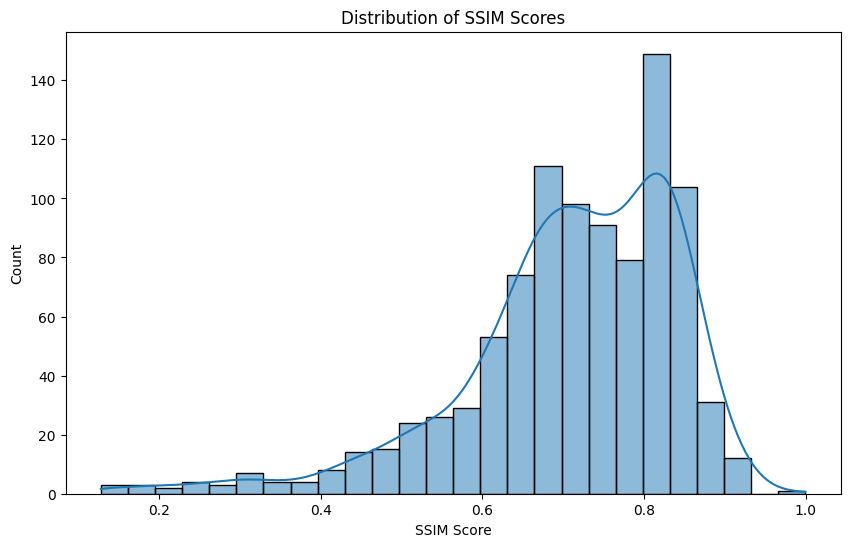

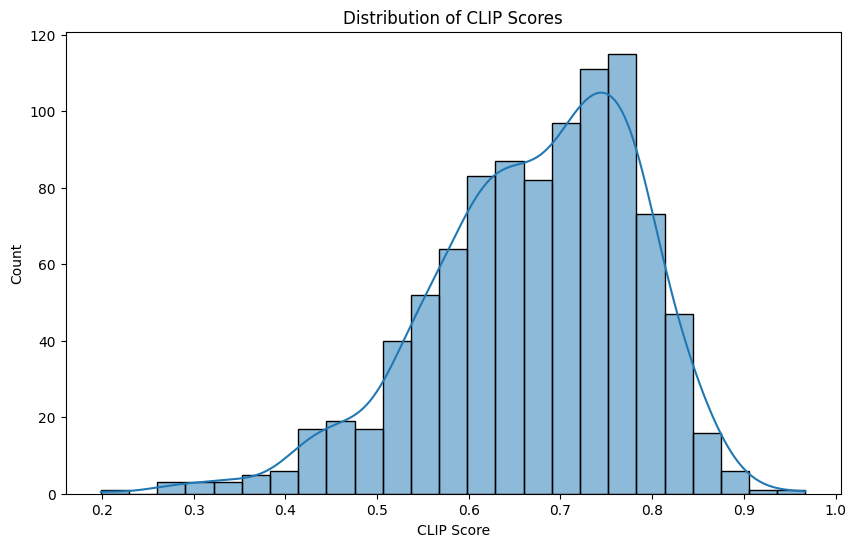

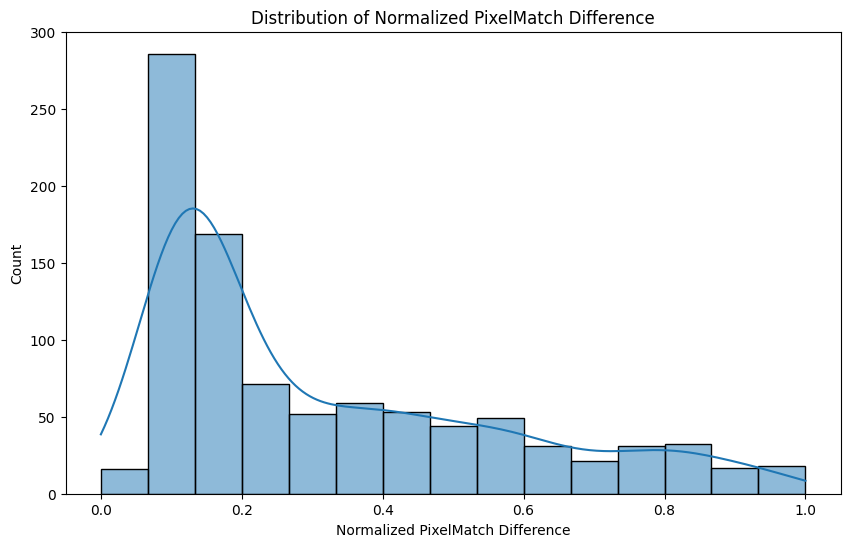

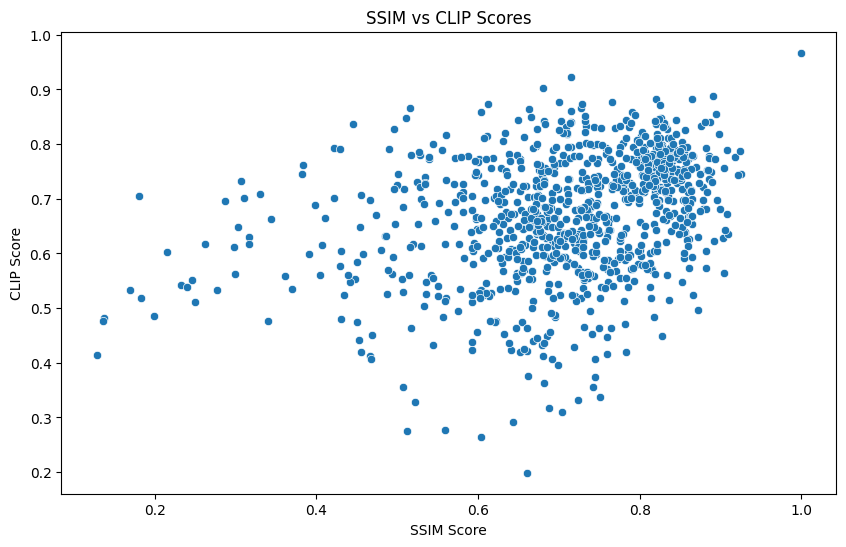

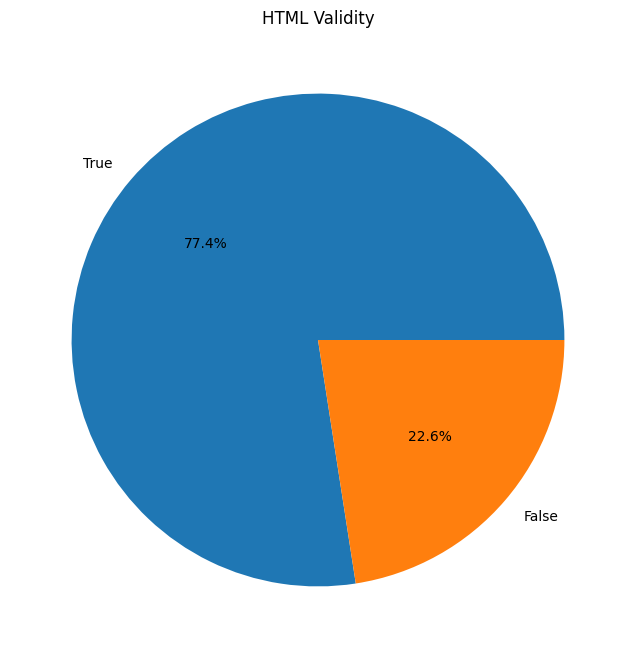

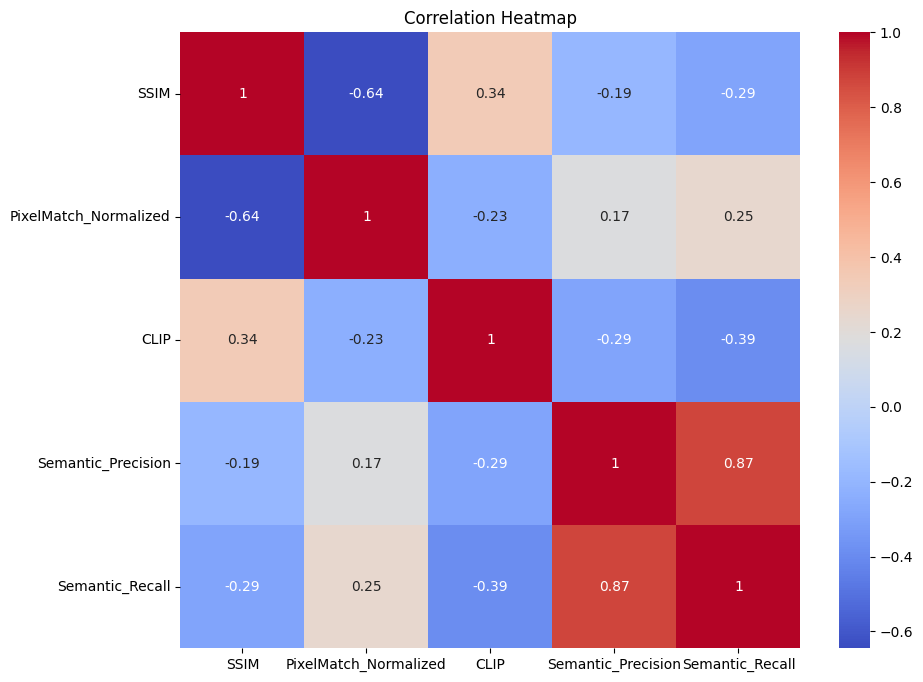

Average SSIM Score: 0.7100
Average CLIP Score: 0.6717
Average Normalized PixelMatch Difference: 0.3177
Percentage of Valid HTML: 0.00%
Average Semantic Precision: 0.0348
Average Semantic Recall: 0.2455

Top 30 websites by SSIM Score:
                               Image_Name      SSIM
550  A930FCEC-FF8B-4277-B1B4-96BF682C0713  0.999746
464  E5D53F97-D3A2-4BB7-8107-6FB035F94722  0.924946
598  5F022D9E-CB19-492C-AD85-189A622FD299  0.923993
479  9A66761C-222D-4CAF-883D-34F851A26E11  0.921862
461  5F2F2DEB-1E17-4EC7-AD0F-1EE88F2C79CD  0.917957
585  2EA0DFF5-8FD4-4C72-B671-8DCF201B95F5  0.909071
552  710F5B56-F747-4BE4-BB3F-C2A1EBFE4EE4  0.908669
459  EACB242F-842B-4652-952B-D596A11FA64F  0.907941
672  B091B275-D8AB-4950-941F-5760D94B24FF  0.905312
499  C74A6307-7A8E-429B-9513-2E1123B04F70  0.904263
551  2D12DF8C-9ECF-40A7-B614-73C892297F27  0.903833
529  8E5E67A8-67FE-4576-A6CE-08EB41920429  0.902712
534  9FED117B-BEB3-4DED-876F-9280B776F8AA  0.899603
624  19A45766-B53C-4F2C-ABC4-9C6825900

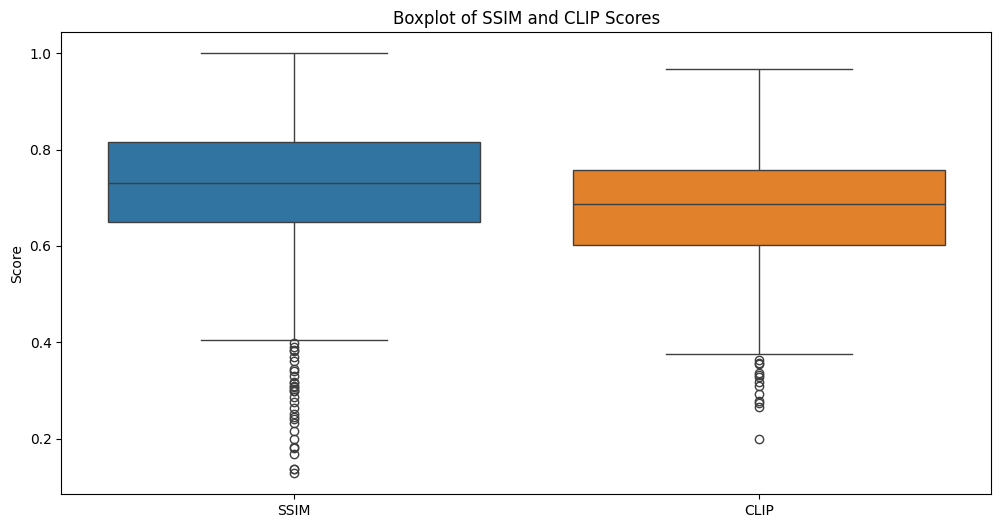

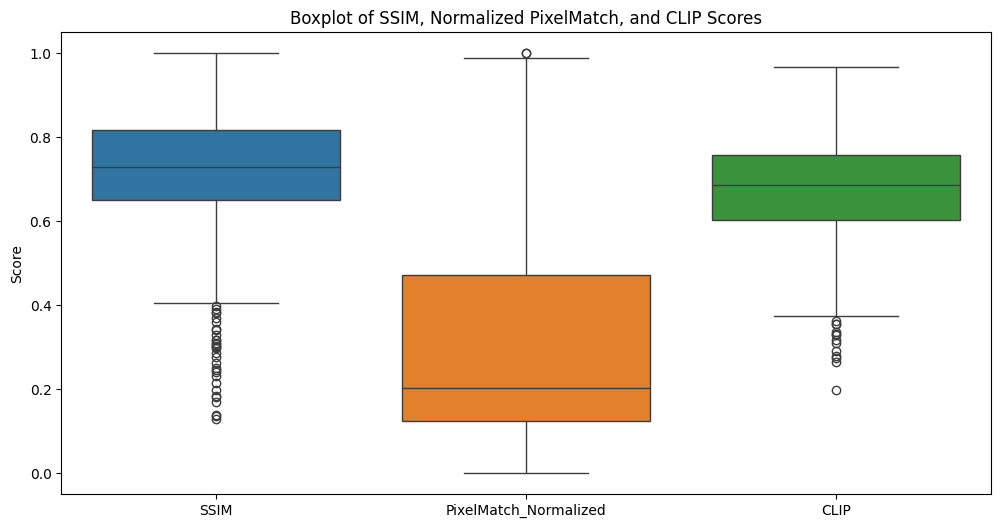

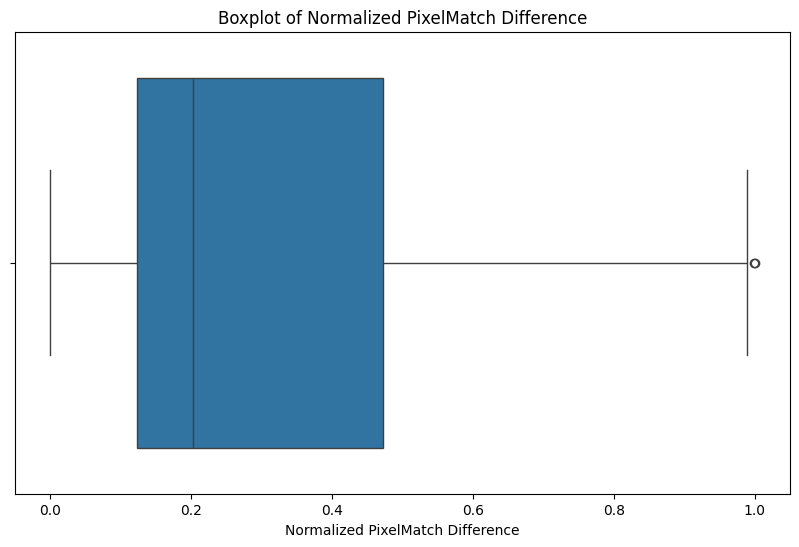

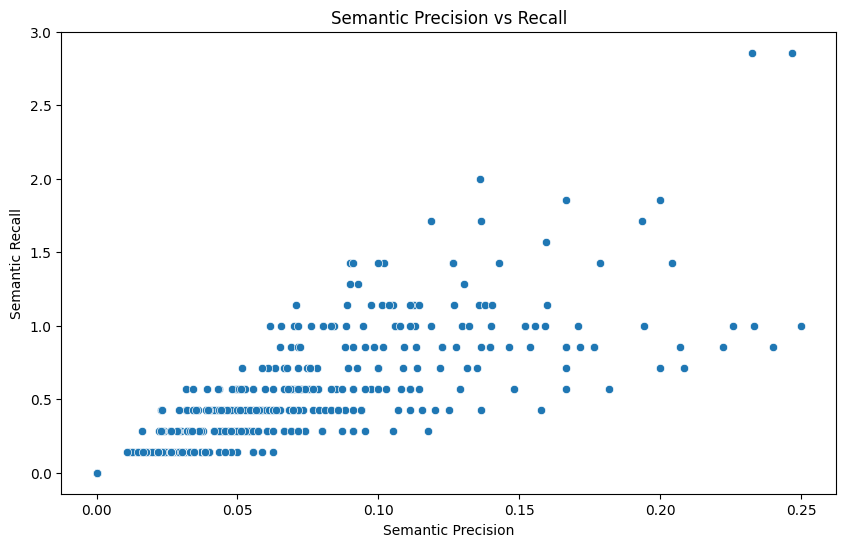

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from sklearn.preprocessing import MinMaxScaler

# Loading the data
data = pd.read_csv('/content/drive/MyDrive/Dissertation Aditya Parmar : testing of Large Lang. Model/Gemini-1.5-flash_metrics.csv', skiprows=1, header=None)

# Assigning column names
data.columns = ['Image_Name', 'SSIM', 'PixelMatch_DiffPercentage', 'CLIP', 'HTML_Valid', 'Semantic_Precision', 'Semantic_Recall']

# Converting columns to appropriate data types
numeric_columns = ['SSIM', 'PixelMatch_DiffPercentage', 'CLIP', 'Semantic_Precision', 'Semantic_Recall']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Using Function to categorise the input data into their respective datasets (Pix2Code, WebUI2Code, Bootstrap Synthetic, Sketch Wireframes)
def categorize_dataset(image_name):
    if image_name.startswith('rw_'):
        return 'Bootstrap Synthetic'
    elif image_name.startswith('sketch'):
        return 'Bootstrap Sketch'
    elif re.match(r'^[A-Z0-9-]+$', image_name):
        return 'Pix2Code'
    else:
        return 'WebUI2Code'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
# data = pd.read_csv('web_metrics.csv')
# Normalising PixelMatch_DiffPercentage to 0-1 scale
scaler = MinMaxScaler()
data['PixelMatch_Normalized'] = scaler.fit_transform(data[['PixelMatch_DiffPercentage']])

# Basic data exploration
print(data.info())
print(data.describe())

# Showing the Distribution of SSIM scores
plt.figure(figsize=(10, 6))
sns.histplot(data['SSIM'], kde=True)
plt.title('Distribution of SSIM Scores')
plt.xlabel('SSIM Score')
plt.ylabel('Count')
plt.show()

# Distribution of CLIP scores
plt.figure(figsize=(10, 6))
sns.histplot(data['CLIP'], kde=True)
plt.title('Distribution of CLIP Scores')
plt.xlabel('CLIP Score')
plt.ylabel('Count')
plt.show()

# Distribution of Normalized PixelMatch Difference
plt.figure(figsize=(10, 6))
sns.histplot(data['PixelMatch_Normalized'], kde=True)
plt.title('Distribution of Normalized PixelMatch Difference')
plt.xlabel('Normalized PixelMatch Difference')
plt.ylabel('Count')
plt.show()

# Scatter plot of SSIM vs CLIP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SSIM', y='CLIP', data=data)
plt.title('SSIM vs CLIP Scores')
plt.xlabel('SSIM Score')
plt.ylabel('CLIP Score')
plt.show()

# HTML Validity pie chart
html_valid_counts = data['HTML_Valid'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(html_valid_counts, labels=html_valid_counts.index, autopct='%1.1f%%')
plt.title('HTML Validity')
plt.show()

# Correlation heatmap
correlation_matrix = data[['SSIM', 'PixelMatch_Normalized', 'CLIP', 'Semantic_Precision', 'Semantic_Recall']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Calculating and print some statistics
print(f"Average SSIM Score: {data['SSIM'].mean():.4f}")
print(f"Average CLIP Score: {data['CLIP'].mean():.4f}")
print(f"Average Normalized PixelMatch Difference: {data['PixelMatch_Normalized'].mean():.4f}")
print(f"Percentage of Valid HTML: {(data['HTML_Valid'] == 'TRUE').mean() * 100:.2f}%")
print(f"Average Semantic Precision: {data['Semantic_Precision'].mean():.4f}")
print(f"Average Semantic Recall: {data['Semantic_Recall'].mean():.4f}")

# Identifing top performing websites
top_ssim = data.nlargest(30, 'SSIM')
top_clip = data.nlargest(30, 'CLIP')
top_pixel_match = data.nsmallest(30, 'PixelMatch_Normalized')

print("\nTop 30 websites by SSIM Score:")
print(top_ssim[['Image_Name', 'SSIM']])

print("\nTop 30 websites by CLIP Score:")
print(top_clip[['Image_Name', 'CLIP']])

print("\nTop 30 websites with least Normalized PixelMatch Difference:")
print(top_pixel_match[['Image_Name', 'PixelMatch_Normalized']])

# Combining Boxplot for SSIM and CLIP
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['SSIM', 'CLIP']])
plt.title('Boxplot of SSIM and CLIP Scores')
plt.ylabel('Score')
plt.show()

# Combining Boxplot for SSIM, Normalized PixelMatch, and CLIP
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['SSIM', 'PixelMatch_Normalized', 'CLIP']])
plt.title('Boxplot of SSIM, Normalized PixelMatch, and CLIP Scores')
plt.ylabel('Score')
plt.show()

# Boxplot for Normalized PixelMatch Difference
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['PixelMatch_Normalized'])
plt.title('Boxplot of Normalized PixelMatch Difference')
plt.xlabel('Normalized PixelMatch Difference')
plt.show()

# Scatter plot of Semantic Precision vs Recall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Semantic_Precision', y='Semantic_Recall', data=data)
plt.title('Semantic Precision vs Recall')
plt.xlabel('Semantic Precision')
plt.ylabel('Semantic Recall')
plt.show()

One-way ANOVA Results:

SSIM:
F-value: 209.98914615091203
p-value: 2.35731822440075e-104

CLIP:
F-value: 205.42918606589302
p-value: 1.4444814545134443e-102

PixelMatch_Normalized:
F-value: 259.4436159634947
p-value: 8.41958421418482e-123

Semantic_Precision:
F-value: 50.17592024425241
p-value: 4.278850627170059e-30

Semantic_Recall:
F-value: 122.23644310426272
p-value: 6.72480384241663e-67


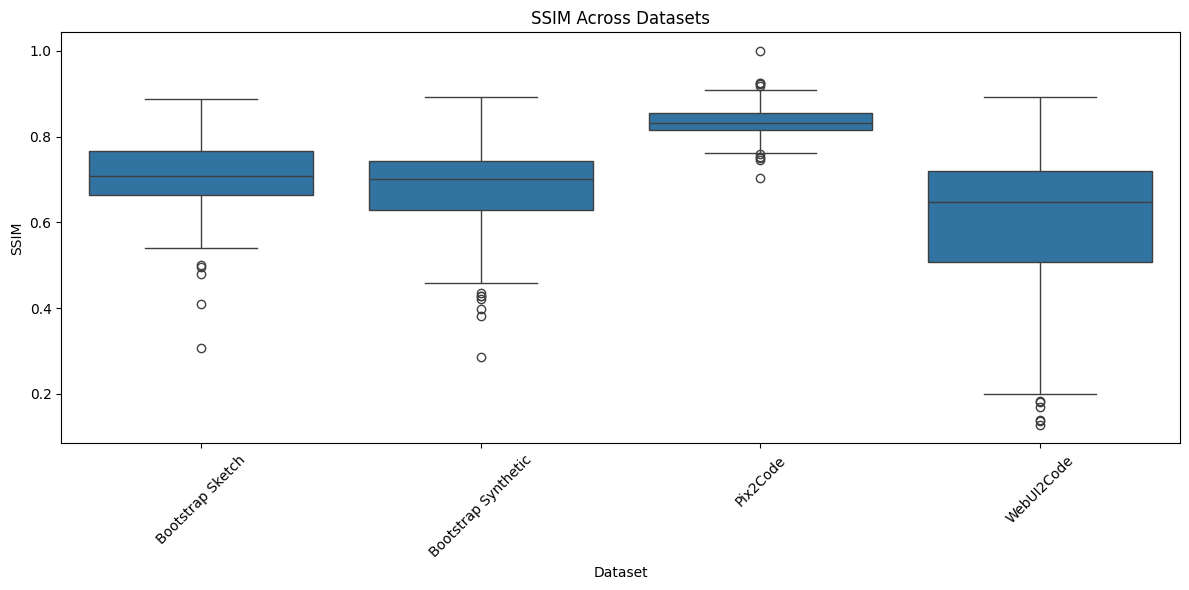

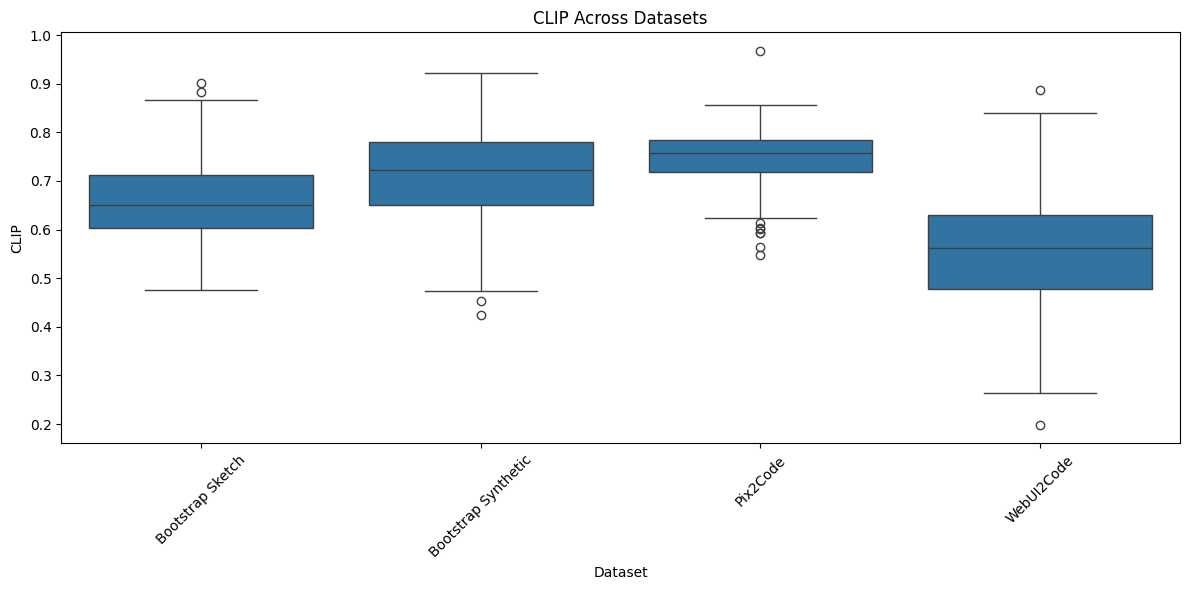

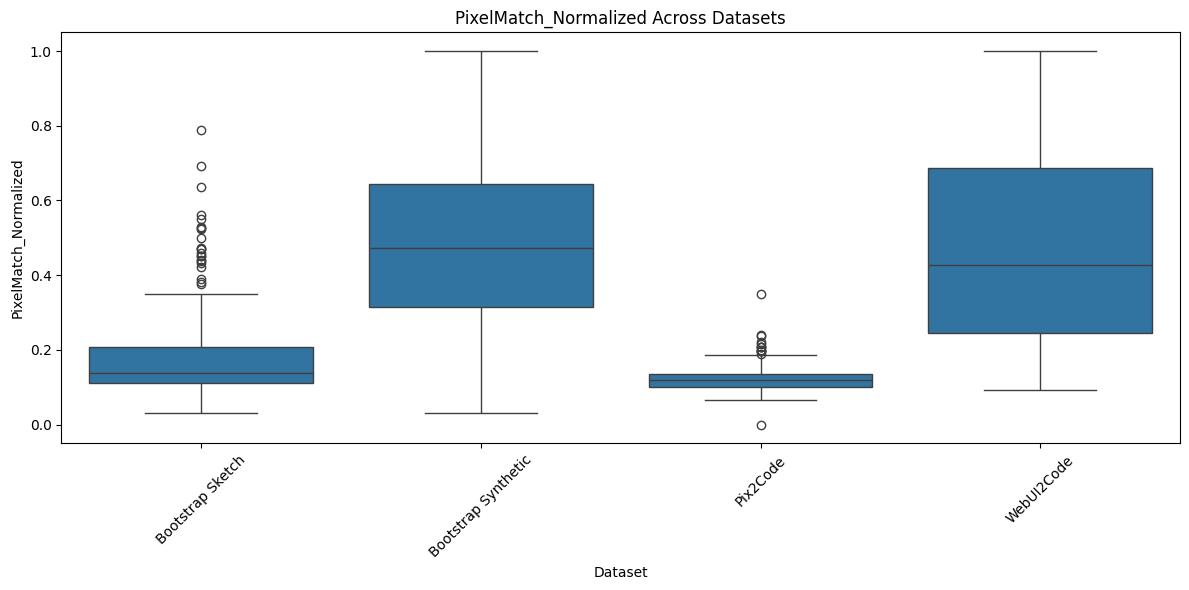

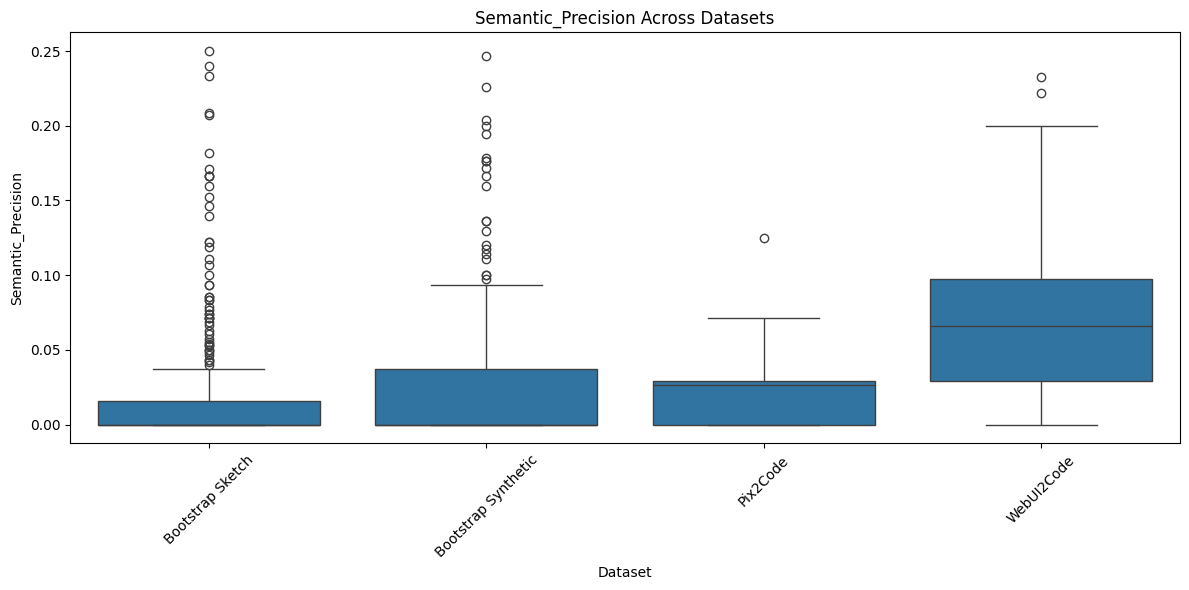

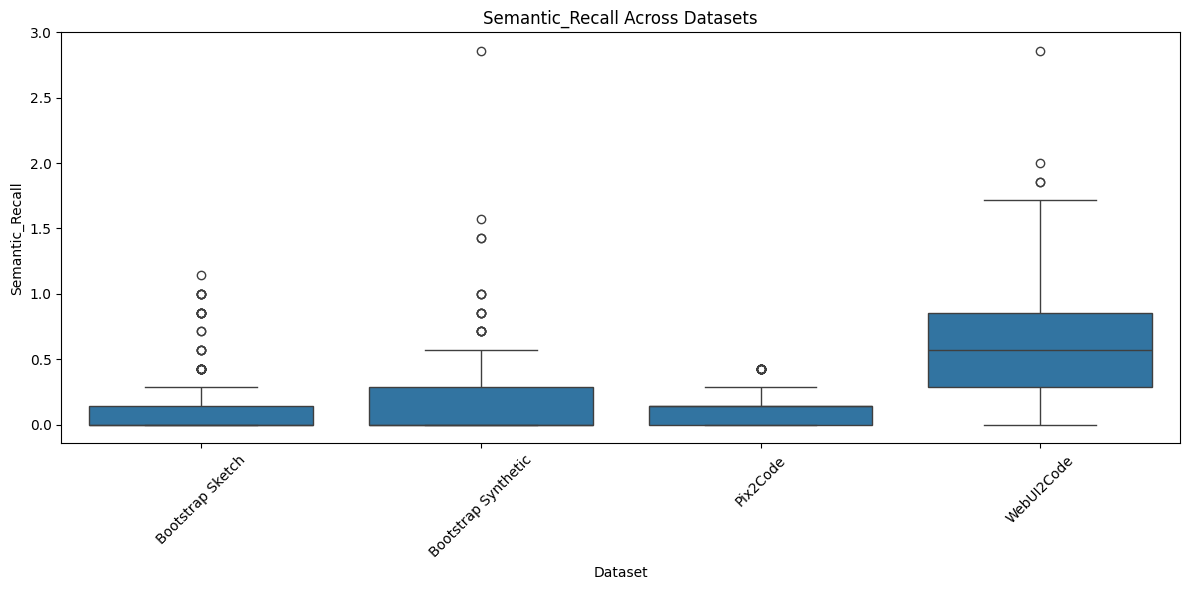

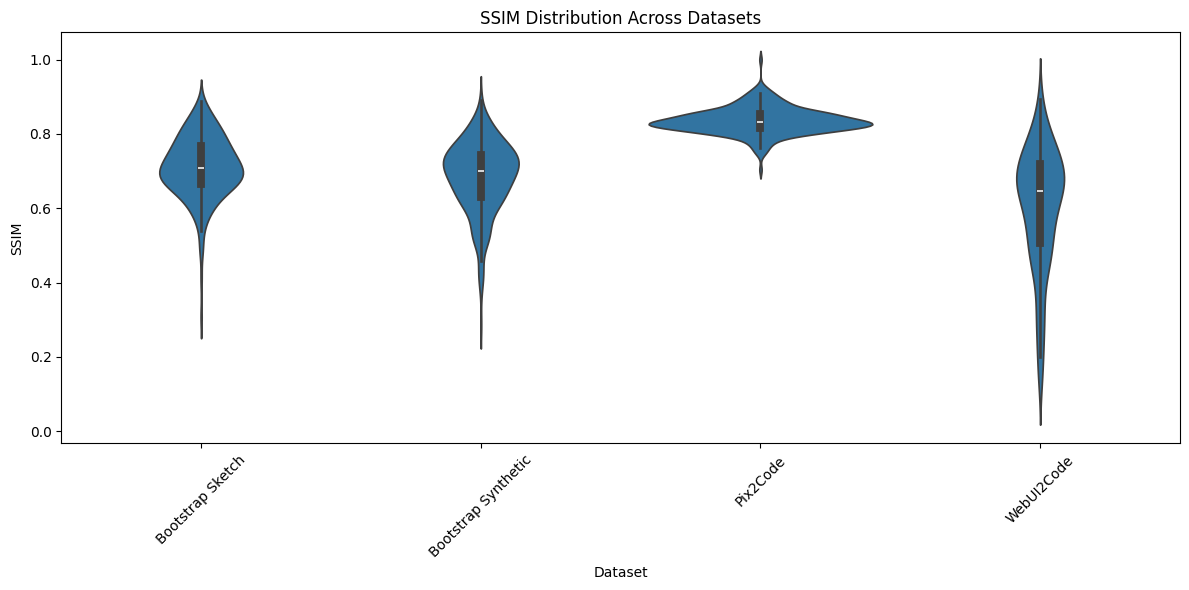

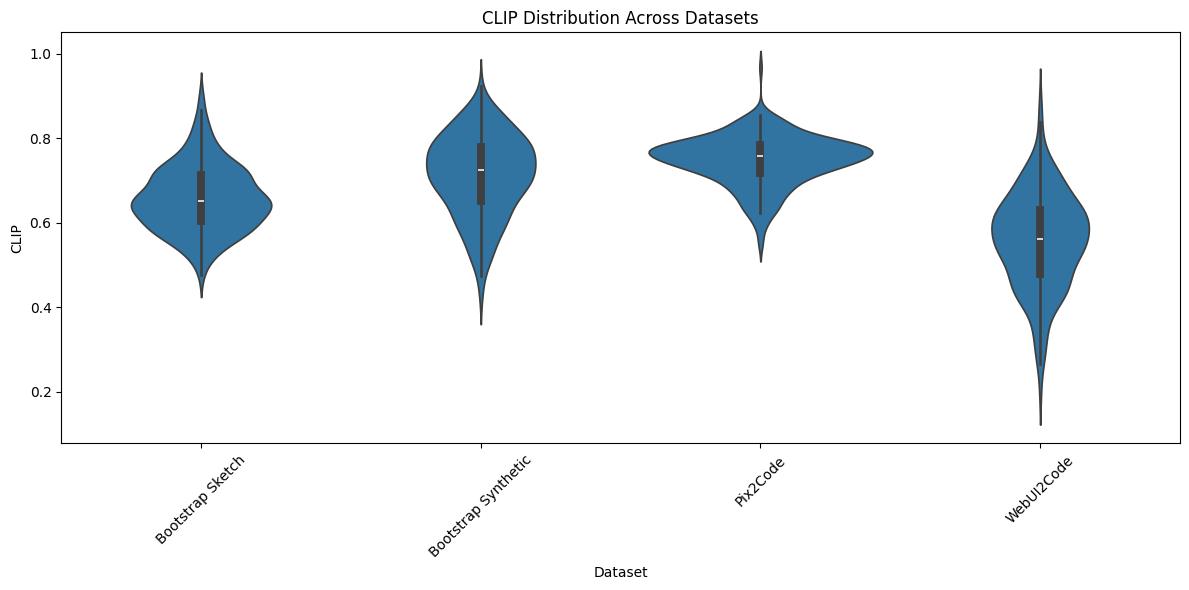

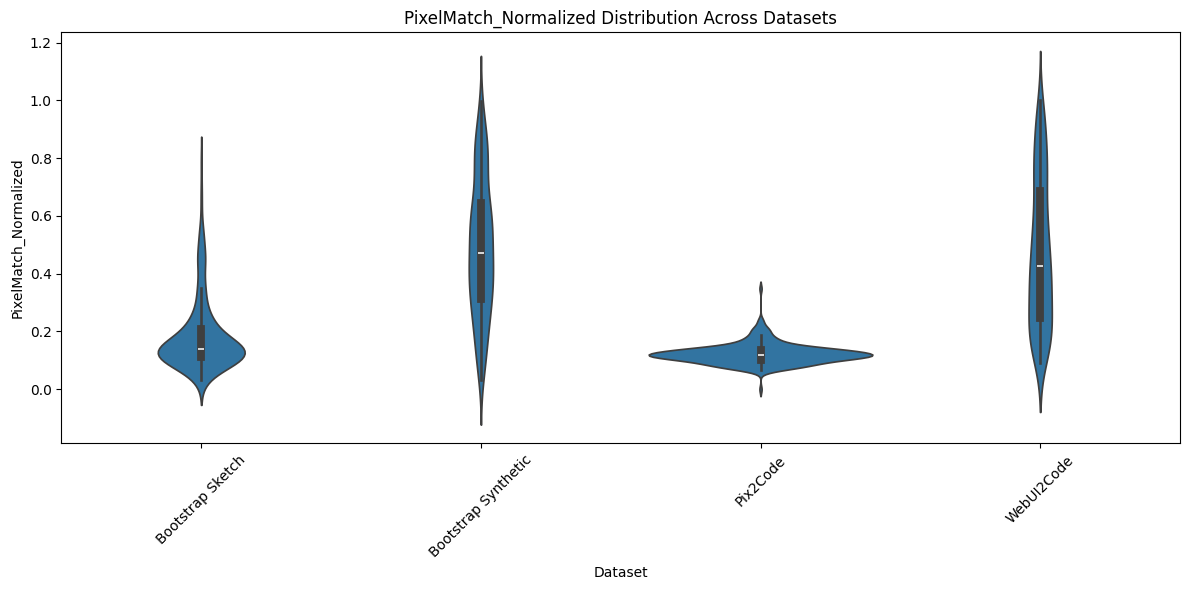

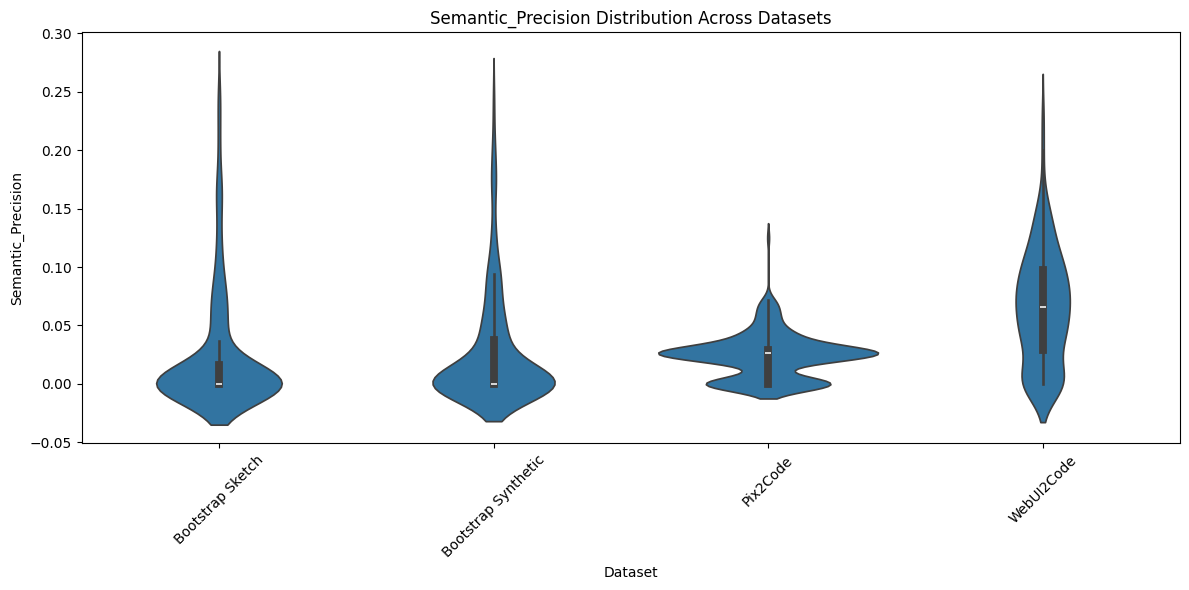

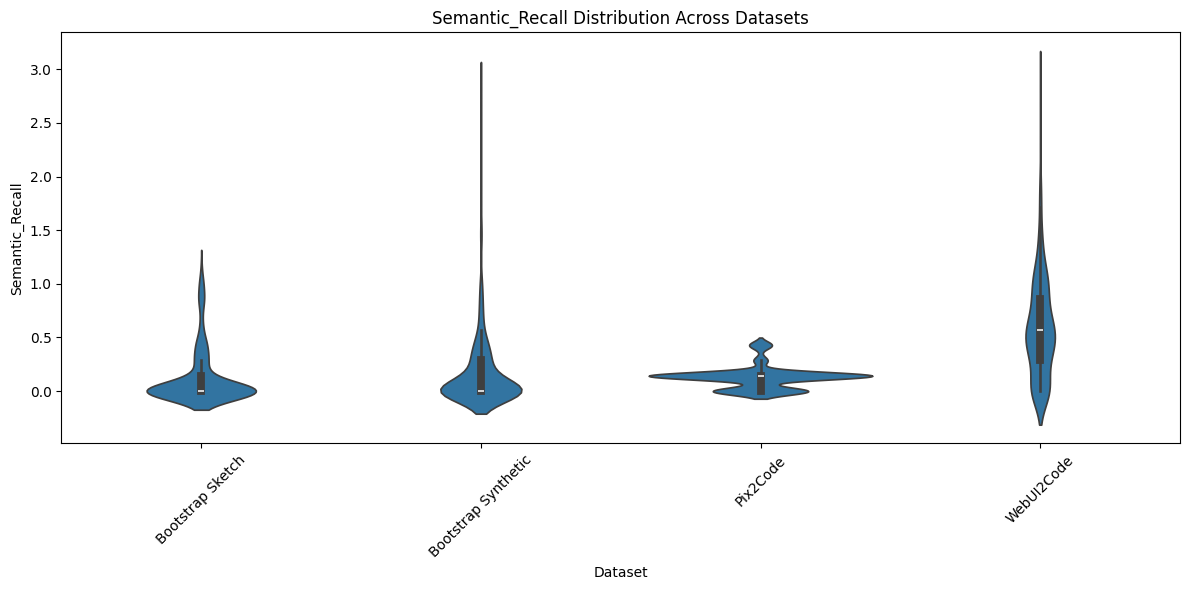


Mean Values for Each Metric Across Datasets:
                         SSIM      CLIP  PixelMatch_Normalized  \
Dataset                                                          
Bootstrap Sketch     0.710650  0.657183               0.184236   
Bootstrap Synthetic  0.683703  0.711625               0.490899   
Pix2Code             0.835530  0.747988               0.123009   
WebUI2Code           0.600740  0.558399               0.470770   

                     Semantic_Precision  Semantic_Recall  
Dataset                                                   
Bootstrap Sketch               0.024363         0.123465  
Bootstrap Synthetic            0.026870         0.158857  
Pix2Code                       0.023898         0.128571  
WebUI2Code                     0.065431         0.587093  


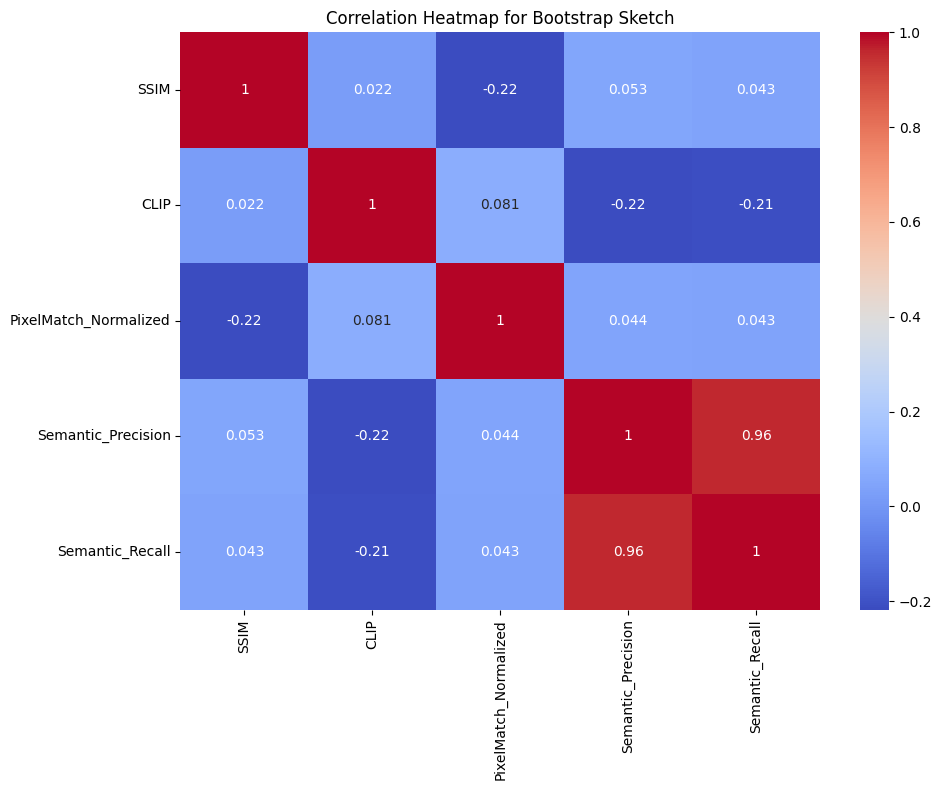

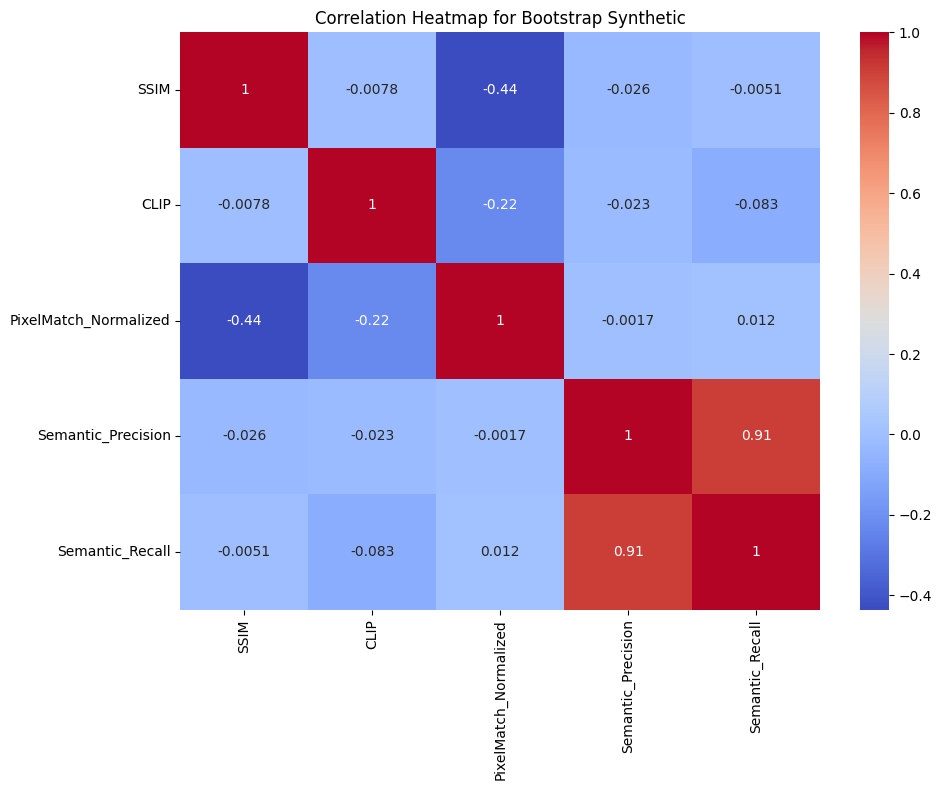

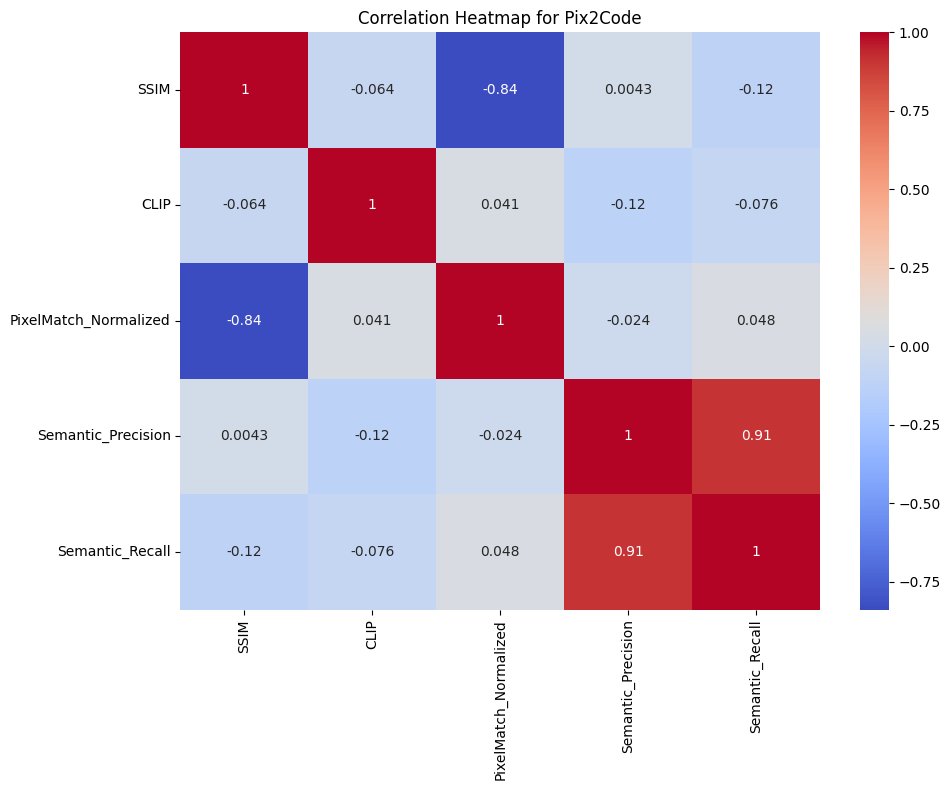

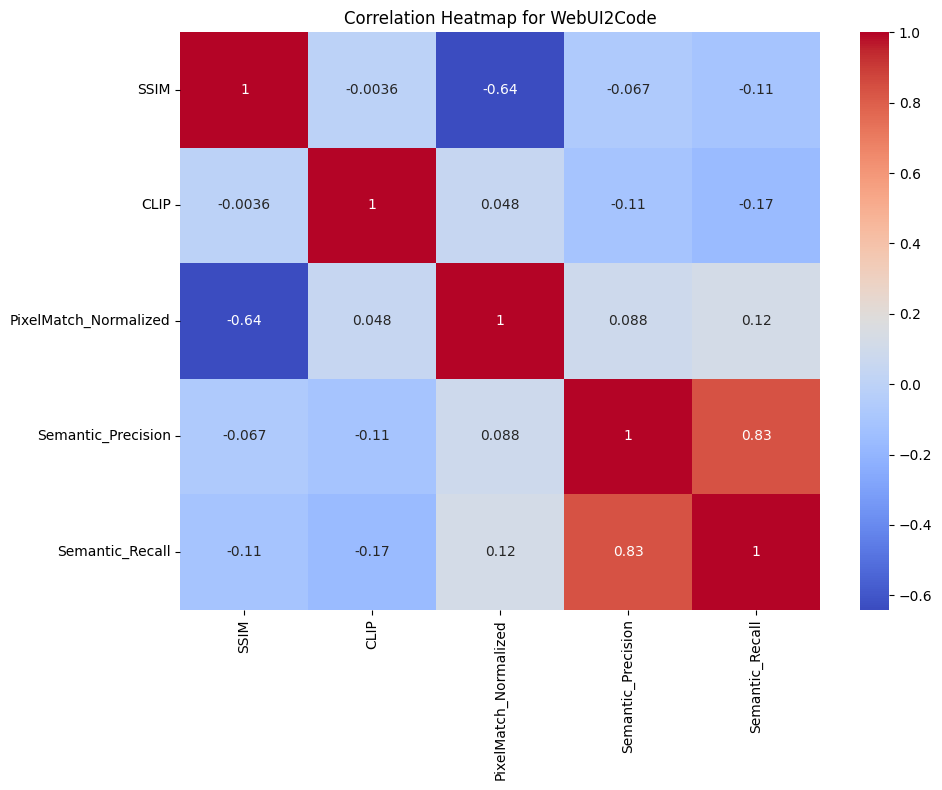

In [ ]:
# Function to categorize datasets
def categorize_dataset(image_name):
    if image_name.startswith('rw_'):
        return 'Bootstrap Synthetic'
    elif image_name.startswith('sketch'):
        return 'Bootstrap Sketch'
    elif re.match(r'^[A-Z0-9-]+$', image_name):
        return 'Pix2Code'
    else:
        return 'WebUI2Code'

# Applying dataset categorization
image_name_column = data.columns[0]  # Assuming the first column is the image/website name
data['Dataset'] = data[image_name_column].apply(categorize_dataset)

# Ensuring PixelMatch_Normalized exists, if not, create it
if 'PixelMatch_Normalized' not in data.columns:
    scaler = MinMaxScaler()
    data['PixelMatch_Normalized'] = scaler.fit_transform(data[['PixelMatch_DiffPercentage']])

# Defining metrics for analysis
metrics = ['SSIM', 'CLIP', 'PixelMatch_Normalized', 'Semantic_Precision', 'Semantic_Recall']

# Performing one-way ANOVA for each metric
print("One-way ANOVA Results:")
for metric in metrics:
    groups = [group[metric] for name, group in data.groupby('Dataset')]
    f_value, p_value = stats.f_oneway(*groups)
    print(f"\n{metric}:")
    print(f"F-value: {f_value}")
    print(f"p-value: {p_value}")

# Boxplots for each metric across datasets
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Dataset', y=metric, data=data)
    plt.title(f'{metric} Across Datasets')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Violin plots for each metric across datasets
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Dataset', y=metric, data=data)
    plt.title(f'{metric} Distribution Across Datasets')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Calculating and printing mean values for each metric across datasets
print("\nMean Values for Each Metric Across Datasets:")
print(data.groupby('Dataset')[metrics].mean())

# Heatmap of correlation matrices for each dataset
for dataset in data['Dataset'].unique():
    plt.figure(figsize=(10, 8))
    subset = data[data['Dataset'] == dataset]
    correlation_matrix = subset[metrics].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for {dataset}')
    plt.tight_layout()
    plt.show()

Pairwise t-tests:

SSIM:
Bootstrap Sketch vs Bootstrap Synthetic:
t-statistic: 3.2150
p-value: 0.0014
Bootstrap Sketch vs Pix2Code:
t-statistic: -21.4324
p-value: 0.0000
Bootstrap Sketch vs WebUI2Code:
t-statistic: 8.9093
p-value: 0.0000
Bootstrap Synthetic vs Pix2Code:
t-statistic: -23.4141
p-value: 0.0000
Bootstrap Synthetic vs WebUI2Code:
t-statistic: 6.8262
p-value: 0.0000
Pix2Code vs WebUI2Code:
t-statistic: 22.1342
p-value: 0.0000

CLIP:
Bootstrap Sketch vs Bootstrap Synthetic:
t-statistic: -6.7097
p-value: 0.0000
Bootstrap Sketch vs Pix2Code:
t-statistic: -14.4291
p-value: 0.0000
Bootstrap Sketch vs WebUI2Code:
t-statistic: 10.7208
p-value: 0.0000
Bootstrap Synthetic vs Pix2Code:
t-statistic: -5.1179
p-value: 0.0000
Bootstrap Synthetic vs WebUI2Code:
t-statistic: 15.9741
p-value: 0.0000
Pix2Code vs WebUI2Code:
t-statistic: 23.2340
p-value: 0.0000

PixelMatch_Normalized:
Bootstrap Sketch vs Bootstrap Synthetic:
t-statistic: -17.4579
p-value: 0.0000
Bootstrap Sketch vs Pix2Code:
t

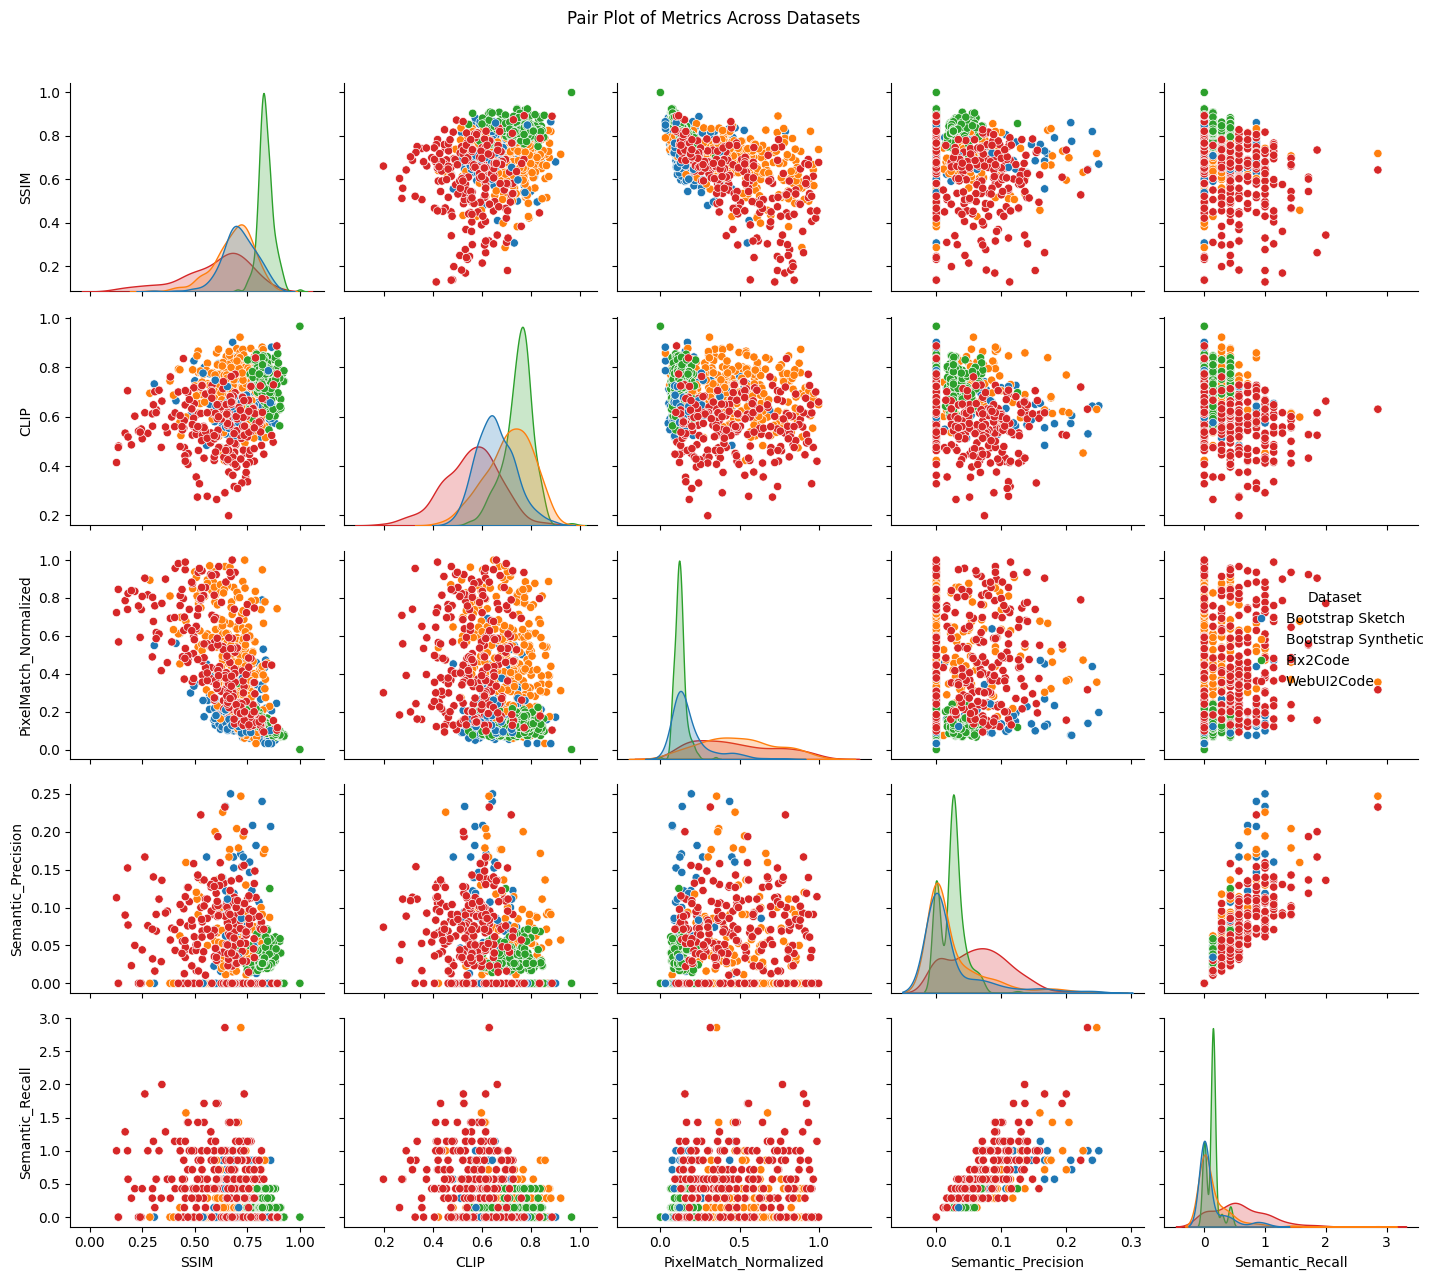

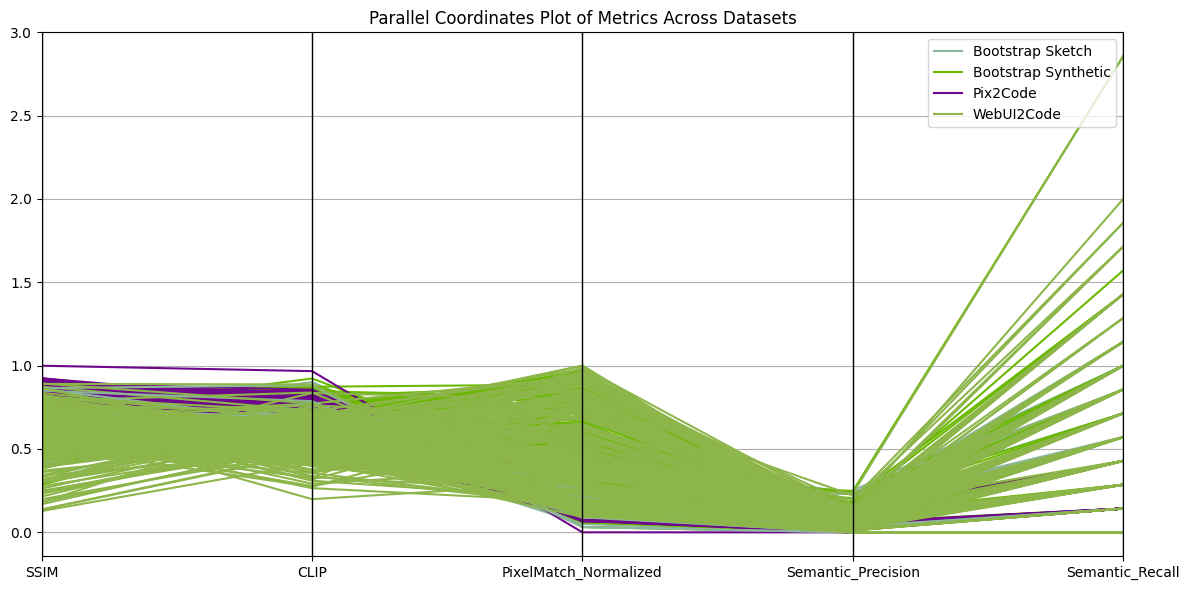

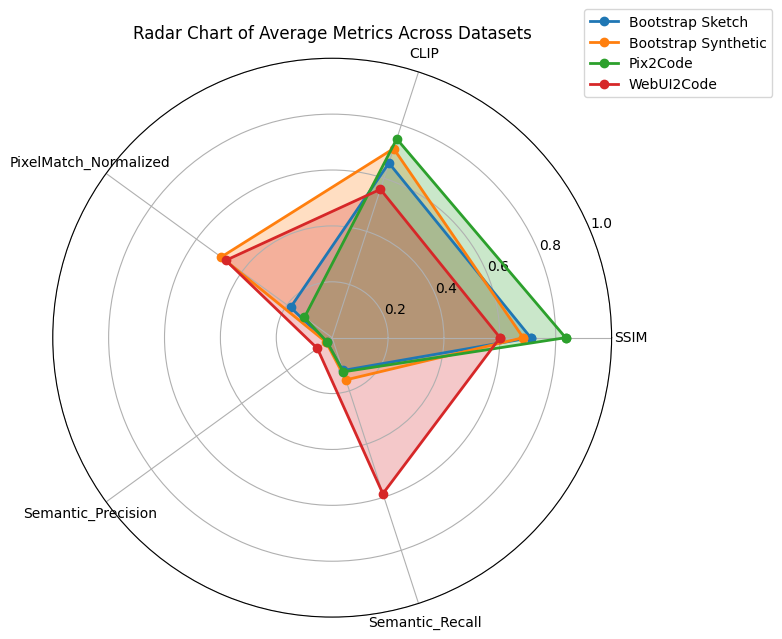


Statistical Summary:
                         SSIM                                    CLIP  \
                         mean       std       min       max      mean   
Dataset                                                                 
Bootstrap Sketch     0.710650  0.084145  0.307268  0.888853  0.657183   
Bootstrap Synthetic  0.683703  0.096263  0.286341  0.891420  0.711625   
Pix2Code             0.835530  0.035291  0.703700  0.999746  0.747988   
WebUI2Code           0.600740  0.163614  0.127904  0.892907  0.558399   

                                                  PixelMatch_Normalized  \
                          std       min       max                  mean   
Dataset                                                                   
Bootstrap Sketch     0.077728  0.476788  0.901972              0.184236   
Bootstrap Synthetic  0.095958  0.423418  0.922860              0.490899   
Pix2Code             0.058415  0.547080  0.967188              0.123009   
WebUI2Code      

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import combinations

# Assuming 'data' is already loaded and preprocessed from the previous cells

# Define metrics for analysis
metrics = ['SSIM', 'CLIP', 'PixelMatch_Normalized', 'Semantic_Precision', 'Semantic_Recall']

# Pairwise t-tests
print("Pairwise t-tests:")
for metric in metrics:
    print(f"\n{metric}:")
    for dataset1, dataset2 in combinations(data['Dataset'].unique(), 2):
        group1 = data[data['Dataset'] == dataset1][metric]
        group2 = data[data['Dataset'] == dataset2][metric]
        t_stat, p_value = stats.ttest_ind(group1, group2)
        print(f"{dataset1} vs {dataset2}:")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_value:.4f}")

# Effect size (Cohen's d) for pairwise comparisons
print("\nEffect Size (Cohen's d):")
for metric in metrics:
    print(f"\n{metric}:")
    for dataset1, dataset2 in combinations(data['Dataset'].unique(), 2):
        group1 = data[data['Dataset'] == dataset1][metric]
        group2 = data[data['Dataset'] == dataset2][metric]
        d = (group1.mean() - group2.mean()) / ((group1.var() + group2.var()) / 2) ** 0.5
        print(f"{dataset1} vs {dataset2}: {d:.4f}")

# Visualizations
# Pair plot
sns.pairplot(data, hue='Dataset', vars=metrics)
plt.suptitle("Pair Plot of Metrics Across Datasets", y=1.02)
plt.tight_layout()
plt.show()

# Parallel coordinates plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data, 'Dataset', cols=metrics)
plt.title("Parallel Coordinates Plot of Metrics Across Datasets")
plt.tight_layout()
plt.show()

# Radar chart
def radar_chart(data, metrics, datasets):
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Close the polygon

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

    for dataset in datasets:
        values = data[data['Dataset'] == dataset][metrics].mean().values
        values = np.concatenate((values, [values[0]]))  # Close the polygon
        ax.plot(angles, values, 'o-', linewidth=2, label=dataset)
        ax.fill(angles, values, alpha=0.25)

    ax.set_thetagrids(angles[:-1] * 180/np.pi, metrics)
    ax.set_ylim(0, 1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title("Radar Chart of Average Metrics Across Datasets")
    plt.tight_layout()
    plt.show()

radar_chart(data, metrics, data['Dataset'].unique())

# Statistical summary
print("\nStatistical Summary:")
summary = data.groupby('Dataset')[metrics].agg(['mean', 'std', 'min', 'max'])
print(summary)

# MANOVA (Multivariate Analysis of Variance)
from scipy.stats import f_oneway

print("\nMANOVA Results:")
f_values = []
p_values = []
for metric in metrics:
    groups = [group[metric] for name, group in data.groupby('Dataset')]
    f_value, p_value = f_oneway(*groups)
    f_values.append(f_value)
    p_values.append(p_value)

manova_results = pd.DataFrame({'Metric': metrics, 'F-value': f_values, 'p-value': p_values})
print(manova_results)

# Post-hoc analysis (if MANOVA is significant)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("\nPost-hoc Analysis (Tukey's HSD):")
for metric in metrics:
    print(f"\n{metric}:")
    tukey = pairwise_tukeyhsd(data[metric], data['Dataset'])
    print(tukey)


<Figure size 1600x1000 with 0 Axes>

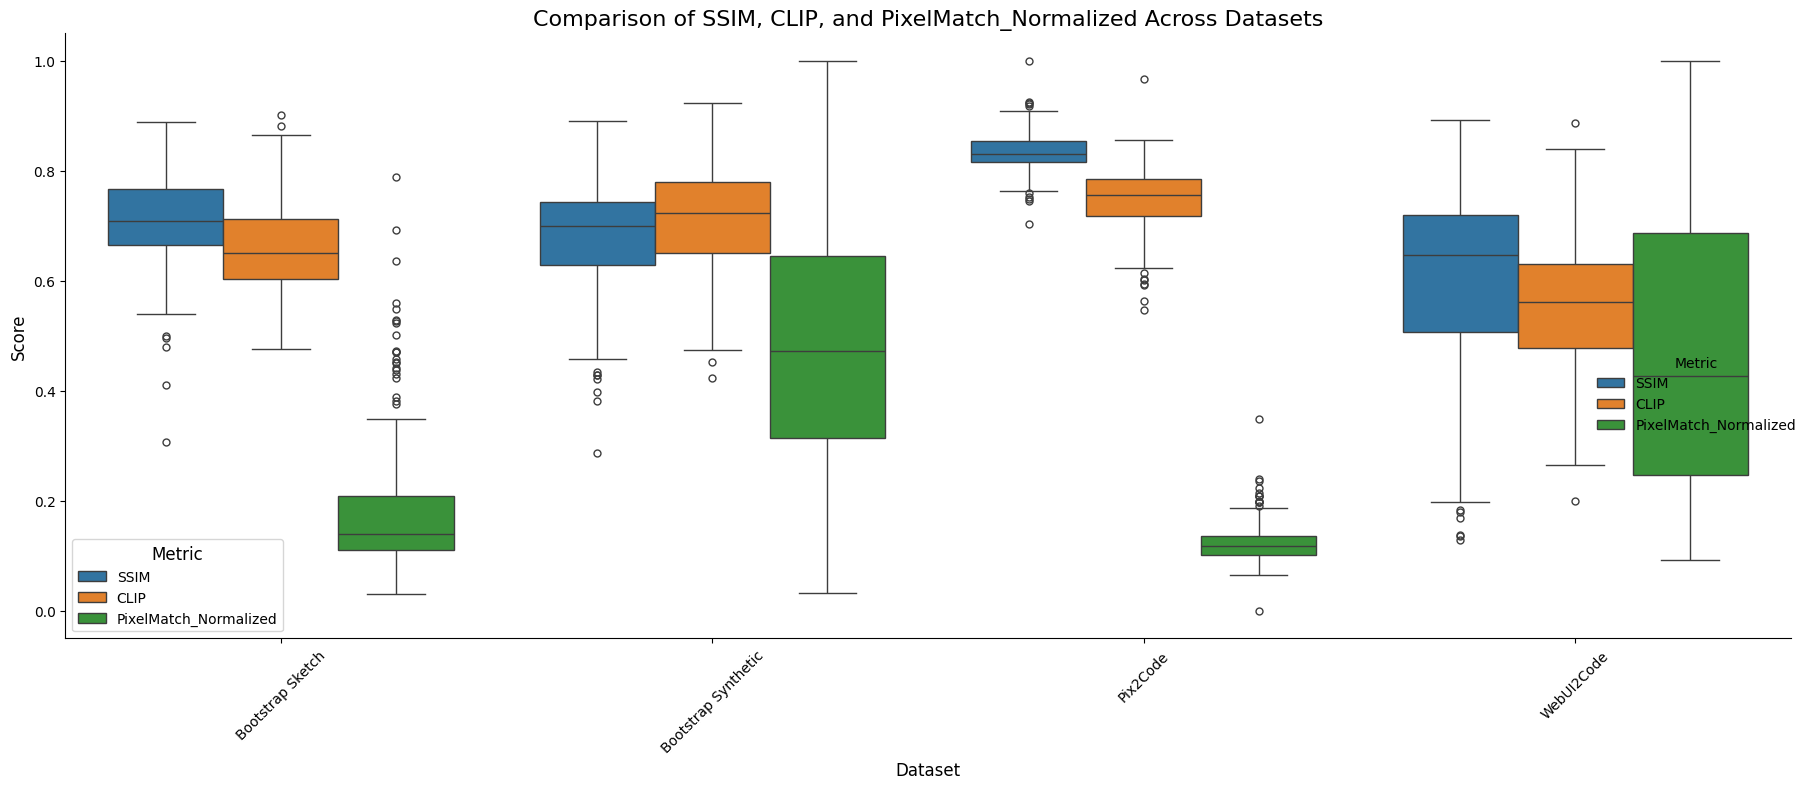


Summary Statistics:
                                             mean  median     std
Dataset             Metric                                       
Bootstrap Sketch    CLIP                   0.6572  0.6503  0.0777
                    PixelMatch_Normalized  0.1842  0.1393  0.1254
                    SSIM                   0.7107  0.7088  0.0841
Bootstrap Synthetic CLIP                   0.7116  0.7235  0.0960
                    PixelMatch_Normalized  0.4909  0.4724  0.2330
                    SSIM                   0.6837  0.7002  0.0963
Pix2Code            CLIP                   0.7480  0.7565  0.0584
                    PixelMatch_Normalized  0.1230  0.1185  0.0358
                    SSIM                   0.8355  0.8309  0.0353
WebUI2Code          CLIP                   0.5584  0.5621  0.1136
                    PixelMatch_Normalized  0.4708  0.4266  0.2534
                    SSIM                   0.6007  0.6476  0.1636


In [ ]:
# Melt the DataFrame to create a long format suitable for grouped box plots
melted_data = pd.melt(data,
                      id_vars=['Dataset'],
                      value_vars=['SSIM', 'CLIP', 'PixelMatch_Normalized'],
                      var_name='Metric',
                      value_name='Score')

# Create the combined plot
plt.figure(figsize=(16, 10))
sns.catplot(data=melted_data, x='Dataset', y='Score', hue='Metric', kind='box', height=8, aspect=2)

plt.title('Comparison of SSIM, CLIP, and PixelMatch_Normalized Across Datasets', fontsize=16)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric', title_fontsize='12', fontsize='10')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Optionally, calculate and print summary statistics
print("\nSummary Statistics:")
summary = melted_data.groupby(['Dataset', 'Metric'])['Score'].agg(['mean', 'median', 'std']).round(4)
print(summary)

# THE END

In [ ]:
# Function to calculate percentage above threshold
def percentage_above_threshold(series, threshold):
    return (series > threshold).mean() * 100

# Function to calculate percentage below threshold
def percentage_below_threshold(series, threshold):
    return (series < threshold).mean() * 100

# Calculate metrics
total_images = len(data)
ssim_above_085 = percentage_above_threshold(data['SSIM'], 0.85)
ssim_above_075 = percentage_above_threshold(data['SSIM'], 0.75)
ssim_above_065 = percentage_above_threshold(data['SSIM'], 0.65)
clip_above_085 = percentage_above_threshold(data['CLIP'], 0.85)
clip_above_075 = percentage_above_threshold(data['CLIP'], 0.75)
clip_above_065 = percentage_above_threshold(data['CLIP'], 0.65)
pixel_below_35 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 35)
pixel_below_25 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 25)
pixel_below_15 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 15)


# Create summary table
summary_data = {
    'Metric': [
        'SSIM > 0.85', 'SSIM > 0.75', 'SSIM > 0.65',
        'CLIP > 0.85', 'CLIP > 0.75', 'CLIP > 0.65',
        'PixelMatch Diff < 35%', 'PixelMatch Diff < 25%', 'PixelMatch Diff < 15%'
    ],
    'Threshold': [0.85, 0.75, 0.65, 0.85, 0.75, 0.65, 35, 25, 15],
    'Count': [
        int(ssim_above_085 * total_images / 100),
        int(ssim_above_075 * total_images / 100),
        int(ssim_above_065 * total_images / 100),
        int(clip_above_085 * total_images / 100),
        int(clip_above_075 * total_images / 100),
        int(clip_above_065 * total_images / 100),
        int(pixel_below_35 * total_images / 100),
        int(pixel_below_25 * total_images / 100),
        int(pixel_below_15 * total_images / 100)
    ],
    'Percentage': [
        f"{ssim_above_085:.2f}%",
        f"{ssim_above_075:.2f}%",
        f"{ssim_above_065:.2f}%",
        f"{clip_above_085:.2f}%",
        f"{clip_above_075:.2f}%",
        f"{clip_above_065:.2f}%",
        f"{pixel_below_35:.2f}%",
        f"{pixel_below_25:.2f}%",
        f"{pixel_below_15:.2f}%"
    ]
}

summary_data = pd.DataFrame(summary_data)

# Display the summary table
print(summary_data.to_string(index=False))
print(f"\nTotal images analyzed: {total_images}")

# Optional: Save the summary table as a CSV file
summary_data.to_csv('image_metrics_summary.csv', index=False)
print("\nSummary table saved as 'image_metrics_summary.csv'")

               Metric  Threshold  Count Percentage
          SSIM > 0.85       0.85     91      9.69%
          SSIM > 0.75       0.75    409     43.10%
          SSIM > 0.65       0.65    711     74.92%
          CLIP > 0.85       0.85     20      2.11%
          CLIP > 0.75       0.75    266     28.03%
          CLIP > 0.65       0.65    575     60.59%
PixelMatch Diff < 35%      35.00    613     64.70%
PixelMatch Diff < 25%      25.00    535     56.38%
PixelMatch Diff < 15%      15.00    382     40.25%

Total images analyzed: 949

Summary table saved as 'image_metrics_summary.csv'
